In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display
plt.rc('font', family='Verdana')

In [10]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
print("Ключи iris_dataset: \n{}".format(iris_dataset.keys()))
print()
print("Названия ответов: {}".format(iris_dataset['target_names']))
print()
print("Названия признаков: \n{}".format(iris_dataset['feature_names']))
print()
print("Описание датасета: \n{}".format(iris_dataset['DESCR']))

Ключи iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Названия ответов: ['setosa' 'versicolor' 'virginica']

Названия признаков: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Описание датасета: 
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    se

In [3]:
print("Тип массива data: {}".format(type(iris_dataset['data'])))
print("Форма массива data: {}".format(iris_dataset['data'].shape))
print("Первые пять строк массива data:\n{}".format(iris_dataset['data'][:5]))

Тип массива data: <class 'numpy.ndarray'>
Форма массива data: (150, 4)
Первые пять строк массива data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [4]:
print("Тип массива target: {}".format(type(iris_dataset['target'])))
print("Форма массива target: {}".format(iris_dataset['target'].shape))
print("Ответы:\n{}".format(iris_dataset['target']))

Тип массива target: <class 'numpy.ndarray'>
Форма массива target: (150,)
Ответы:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], 
                                                    iris_dataset['target'], 
                                                    random_state=0)

In [6]:
print("форма массива X_train: {}".format(X_train.shape))
print("форма массива y_train: {}".format(y_train.shape))
print("форма массива X_test: {}".format(X_test.shape))
print("форма массива y_test: {}".format(y_test.shape))

форма массива X_train: (112, 4)
форма массива y_train: (112,)
форма массива X_test: (38, 4)
форма массива y_test: (38,)


# ВИЗУАЛИЗАЦИЯ

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


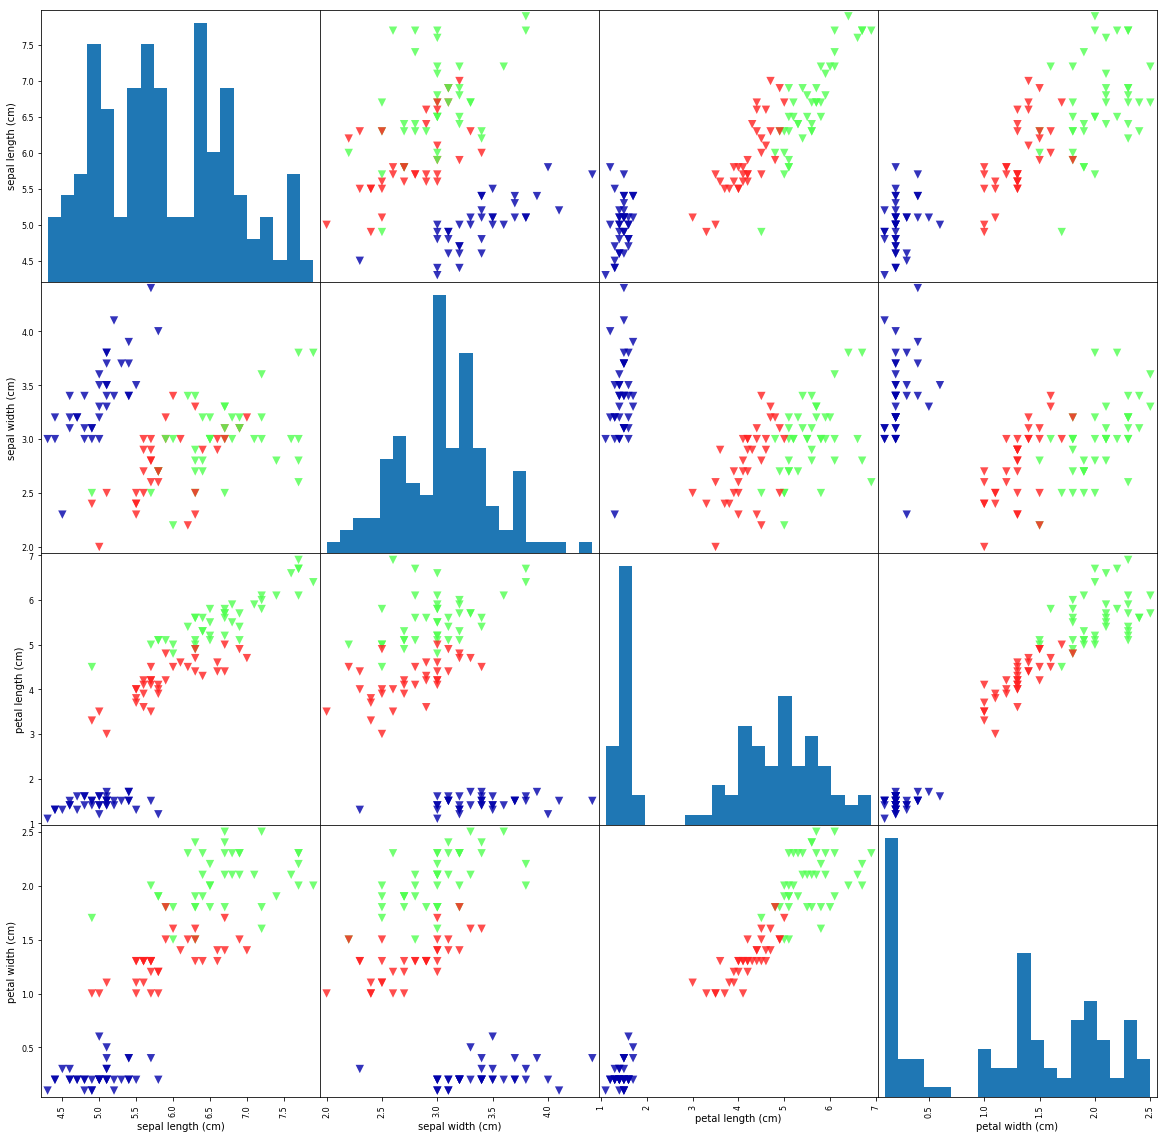

In [48]:
# создаем dataframe из данных в массиве X_train
# маркируем столбцы, используя строки в iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# создаем матрицу рассеяния из dataframe, цвет точек задаем с помощью y_train
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(20, 20), marker='v',
                        hist_kwds={'bins': 20}, 
                        s=70, 
                        alpha=.8, 
                        cmap=mglearn.cm3)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [50]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### Представьте, что мы нашли в дикой природе ирис с длиной чашелистика 5 см, шириной чашелистика 2.9 см, длиной лепестка 1 см и шириной лепестка 0.2 см. К какому сорту ириса нужно отнести этот цветок? Мы можем поместить эти данные в массив NumPy, снова вычисляя форму массива, т.е. количество примеров (1), умноженное на количество признаков (4): 

In [53]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("форма массива X_new: {}".format(X_new.shape))

форма массива X_new: (1, 4)


In [54]:
prediction = knn.predict(X_new)
print("Прогноз: {}".format(prediction))
print("Спрогнозированная метка: {}".format(
iris_dataset['target_names'][prediction]))

Прогноз: [0]
Спрогнозированная метка: ['setosa']


In [58]:
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора:\n {}".format(y_pred))
print()
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred == y_test)))
print('--- score ---')
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

Прогнозы для тестового набора:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]

Правильность на тестовом наборе: 0.97
--- score ---
Правильность на тестовом наборе: 0.97


### Краткое изложение программного кода, необходимого для всей процедуры обучения и оценки модели:

In [77]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], 
                                                    random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Правильность на тестовом наборе: {:.4f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе: 0.9737
